# Benchmark Results on Emmy (Try 2)

In [1]:
import json
import statistics

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

PROM_1_RESULT_PATH = "./prometheus_1node_highres//results.json"
PROM_1_VMSTAT_PATH = "./prometheus_1node_highres//vmstat.json"
PROM_2_RESULT_PATH = "./prometheus_2node/results.json"
PROM_2_VMSTAT_PATH = "./prometheus_2node/vmstat.json"
NODE_EXP_PATH = "./node_exporter/parsed.json"


def load_json(path):
    with open(path, "r") as fp:
        return json.load(fp)

PROM_2_RESULT = load_json(PROM_2_RESULT_PATH)
PROM_2_VMSTAT = load_json(PROM_2_VMSTAT_PATH)
NODE_EXP = load_json(NODE_EXP_PATH)

## Node Exporter Analysis

In [2]:
SEQUENTIAL = NODE_EXP['sequential']
PARALLEL_WRK = NODE_EXP['parallel_wrk']

2


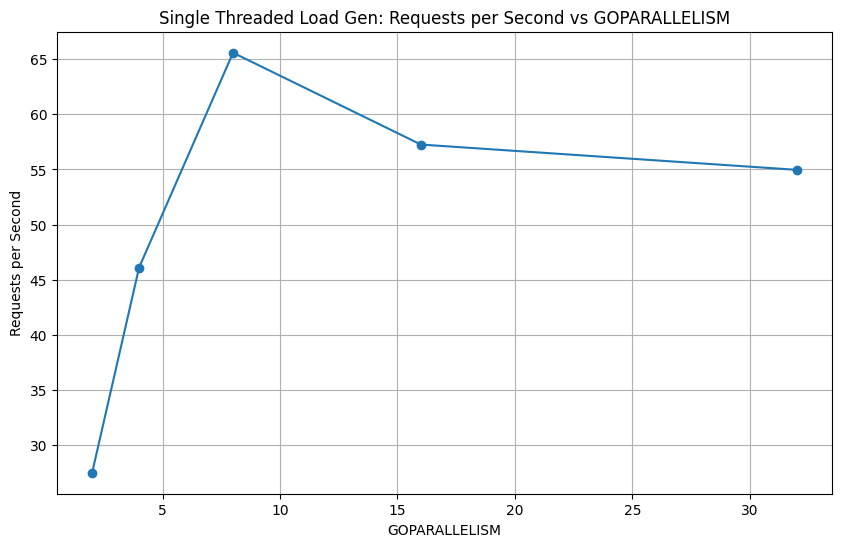

[27.52, 46.11, 65.57, 57.25, 54.96]


In [3]:
# sequential[1] failed so its filtered out, see sorted_keys
sorted_keys = [*sorted([int(x) for x in SEQUENTIAL['output'].keys()])][1:]
reqs_sec_values = [SEQUENTIAL['output'][str(key)][0]['req_sec_avg'] for key in sorted_keys]

print(sorted_keys[0])
reqs_sec_values[0]

plt.figure(figsize=(10, 6))
plt.plot(sorted_keys, reqs_sec_values, marker='o')
plt.xlabel('GOPARALLELISM')
plt.ylabel('Requests per Second')
plt.title('Single Threaded Load Gen: Requests per Second vs GOPARALLELISM')
plt.grid(True)
plt.show()
print(reqs_sec_values)

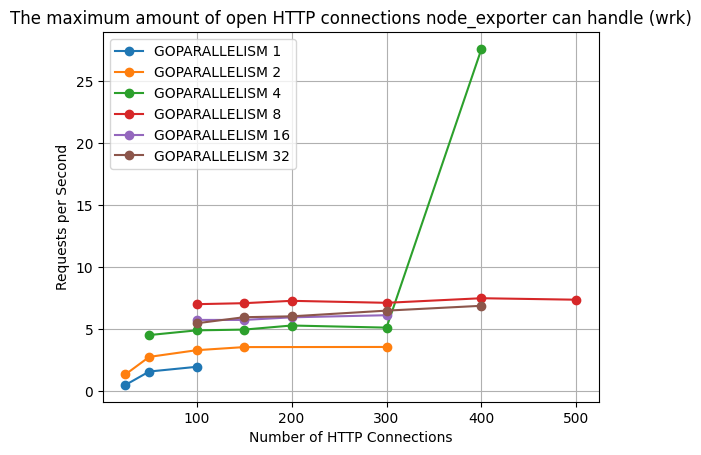

In [4]:

for goparallelism in sorted(int(x) for x in PARALLEL_WRK['output'].keys()):
    connection_performance = []
    for measurement in PARALLEL_WRK['output'][str(goparallelism)]:
        if measurement['threads'] != 16:
            continue
        connection_performance.append((measurement['connections'], measurement['req_sec_avg']))
    connection_performance.sort(key=lambda x:x[0])
    plt.plot(*zip(*connection_performance), label=f"GOPARALLELISM {goparallelism}", marker='o')

plt.xlabel('Number of HTTP Connections')
plt.ylabel('Requests per Second')
plt.title('The maximum amount of open HTTP connections node_exporter can handle (wrk)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# I couldnt get the parser properly working so I did it manually
# Tuple are (connections, avg latency, avg reqs sec, error_rate) using 16 threads wrk
GOPARALLELISM_1 = [
  (25, 0.969, 0.50),
  (50, 1.59, 1.58)
]
FAULT_1 = [
  (25, 0/986),
  (50, 771/947),
  (100, 889/893),
  (150, 804/809),
  (200, 725/725)
]

GOPARALLELISM_2 = [
  (25, 0.584, 1.35),
  (50, 1.33, 2.96),
  (100, 1.39, 3.30)
]
FAULT_2 = [
  (25, 0/1663),
  (50, 517/1588),
  (100, 1291/1555),
  (150, 1336/1477),
  (200, 1382/1382)
]

GOPARALLELISM_4 = [
  (25, 0.339, 3.21),
  (50, 0.977, 4.52),
  (100, 1.39, 4.90),
  (150, 1.02, 4.96)
]
FAULT_4 = [
  (25, 0/2818),
  (50, 54/2853),
  (100, 1545/2746),
  (150, 2480/2719),
  (200, 2510/2596),
  (300, 2547/2571),
  (400, 2345/2345)
]

GOPARALLELISM_8 = [
  (25, 0.220, 5.29),
  (50, 0.658, 6.27),
  (100, 1.23, 7.01),
  (150, 1.71, 7.09),
  (200, 1.38, 7.28),
  (300, 1.30, 7.12)
]
FAULT_8 = [
  (25, 0/4358),
  (50, 0/4351),
  (100, 151/4525),
  (150, 1547/4407),
  (200, 3864/4428),
  (300, 4281/4304),
  (400, 4278/4287),
  (500, 4135/4162)
]

GOPARALLELISM_16 = [
  (25, 0.278, 3.59),
  (50, 0.838, 5.19),
  (100, 1.53, 5.74),
  (150, 1.65, 5.74),
  (200, 1.73, 5.95)
]
FAULT_16 = [
  (25, 0/3445),
  (50, 0/3414),
  (100, 668/3421),
  (150, 2639/3370),
  (200, 3175/3326),
  (300, 3258/3269),
  (400, 3186/3189),
  (500, 3179/3179)
  
]





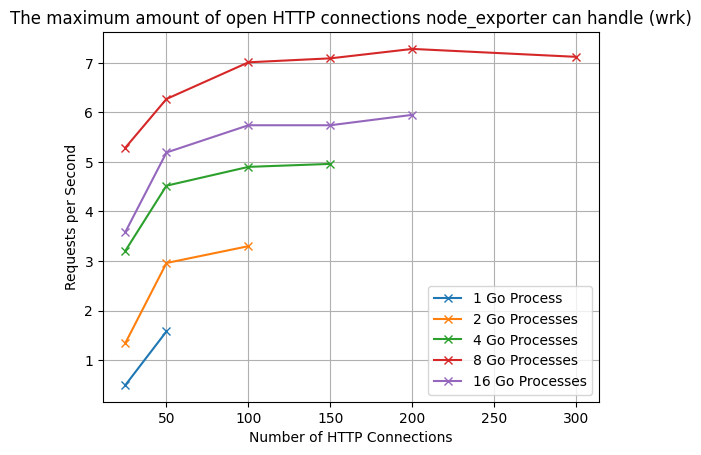

In [6]:
plt.plot([x[0] for x in GOPARALLELISM_1], [x[2] for x in GOPARALLELISM_1], label=f"1 Go Process", marker='x')
plt.plot([x[0] for x in GOPARALLELISM_2], [x[2] for x in GOPARALLELISM_2], label=f"2 Go Processes", marker='x')
plt.plot([x[0] for x in GOPARALLELISM_4], [x[2] for x in GOPARALLELISM_4], label=f"4 Go Processes", marker='x')
plt.plot([x[0] for x in GOPARALLELISM_8], [x[2] for x in GOPARALLELISM_8], label=f"8 Go Processes", marker='x')
plt.plot([x[0] for x in GOPARALLELISM_16], [x[2] for x in GOPARALLELISM_16], label=f"16 Go Processes", marker='x')

plt.xlabel('Number of HTTP Connections')
plt.ylabel('Requests per Second')
plt.title('The maximum amount of open HTTP connections node_exporter can handle (wrk)')
plt.legend()
plt.grid(True)
plt.show()

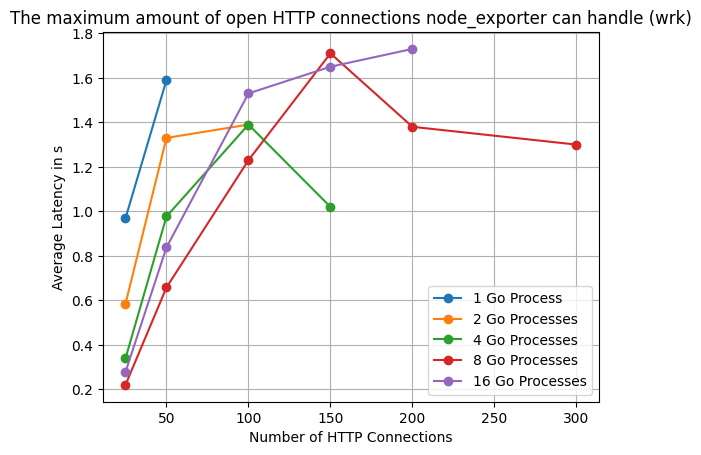

In [7]:
plt.plot([x[0] for x in GOPARALLELISM_1], [x[1] for x in GOPARALLELISM_1], label=f"1 Go Process", marker='o')
plt.plot([x[0] for x in GOPARALLELISM_2], [x[1] for x in GOPARALLELISM_2], label=f"2 Go Processes", marker='o')
plt.plot([x[0] for x in GOPARALLELISM_4], [x[1] for x in GOPARALLELISM_4], label=f"4 Go Processes", marker='o')
plt.plot([x[0] for x in GOPARALLELISM_8], [x[1] for x in GOPARALLELISM_8], label=f"8 Go Processes", marker='o')
plt.plot([x[0] for x in GOPARALLELISM_16], [x[1] for x in GOPARALLELISM_16], label=f"16 Go Processes", marker='o')

plt.xlabel('Number of HTTP Connections')
plt.ylabel('Average Latency in s')
plt.title('The maximum amount of open HTTP connections node_exporter can handle (wrk)')
plt.legend()
plt.grid(True)
plt.show()

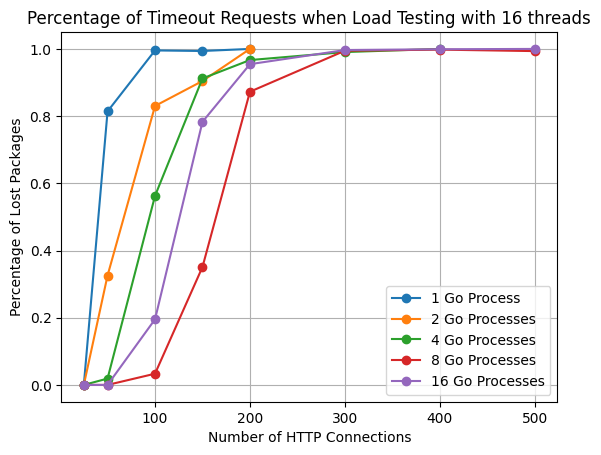

In [8]:
plt.plot([x[0] for x in FAULT_1], [x[1] for x in FAULT_1], label=f"1 Go Process", marker='o')
plt.plot([x[0] for x in FAULT_2], [x[1] for x in FAULT_2], label=f"2 Go Processes", marker='o')
plt.plot([x[0] for x in FAULT_4], [x[1] for x in FAULT_4], label=f"4 Go Processes", marker='o')
plt.plot([x[0] for x in FAULT_8], [x[1] for x in FAULT_8], label=f"8 Go Processes", marker='o')
plt.plot([x[0] for x in FAULT_16], [x[1] for x in FAULT_16], label=f"16 Go Processes", marker='o')

plt.xlabel('Number of HTTP Connections')
plt.ylabel('Percentage of Lost Packages')
plt.title('Percentage of Timeout Requests when Load Testing with 16 threads')
plt.legend()
plt.grid(True)
plt.show()

## Prometheus Analysis

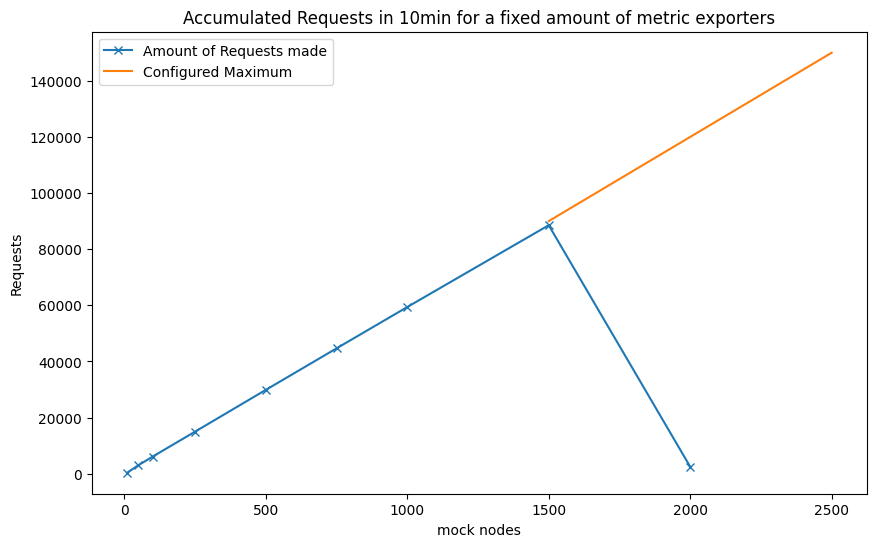

In [9]:
# Get the amount of total requests per second
# Also compute the maximal one
total_amount_of_requests = []
theoretical_maxima = []
for number_of_mock_clients in PROM_2_RESULT.keys():
    actual_reqs = sum(PROM_2_RESULT[number_of_mock_clients])
    # maximum: 6 per minute, 10 minutes
    number_of_mock_clients = int(number_of_mock_clients)
    theoretical_max = number_of_mock_clients * 60
    theoretical_maxima.append((number_of_mock_clients, theoretical_max))

DATA_OLD_MEASUREMENTS = ((10, 50, 100, 250, 500, 750, 1000, 1500, 2000),
                         (360, 3046, 6091, 14990, 29868, 44664, 59388, 88544, 2491))

total_amount_of_requests.sort(key=lambda x: x[0])
theoretical_maxima.sort(key=lambda x: x[0])
plt.figure(figsize=(10, 6))
plt.plot(*DATA_OLD_MEASUREMENTS, marker='x', label="Amount of Requests made")
plt.plot(*zip(*total_amount_of_requests), marker='x', label="Split on Two Nodes")
plt.plot(*zip(*theoretical_maxima), label="Configured Maximum")
plt.xlabel('mock nodes')
plt.ylabel('Requests')
plt.title('Accumulated Requests in 10min for a fixed amount of metric exporters')
plt.legend()
plt.show()


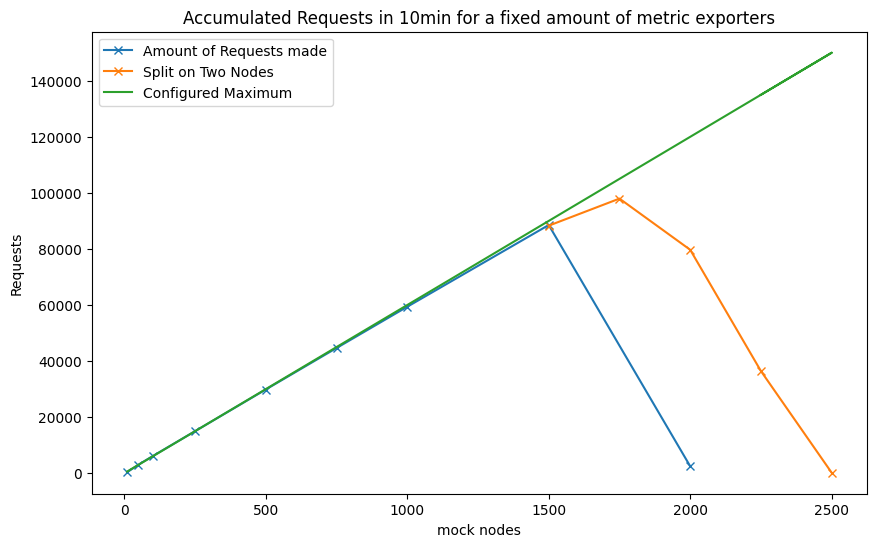

In [10]:
# Get the amount of total requests per second
# Also compute the maximal one
total_amount_of_requests = []
theoretical_maxima = []
for number_of_mock_clients in PROM_2_RESULT.keys():
    actual_reqs = sum(PROM_2_RESULT[number_of_mock_clients])
    # maximum: 6 per minute, 10 minutes
    number_of_mock_clients = int(number_of_mock_clients)
    theoretical_max = number_of_mock_clients * 60

    total_amount_of_requests.append((number_of_mock_clients, actual_reqs))
    theoretical_maxima.append((number_of_mock_clients, theoretical_max))


DATA_OLD_MEASUREMENTS = ((10, 50, 100, 250, 500, 750, 1000, 1500, 2000),
            (360, 3046, 6091, 14990, 29868, 44664, 59388, 88544, 2491))

THEORETICAL_MAXIMA = (
    (2250, 2500, 2000, 1750, 1500, 1000, 750, 500, 250, 100, 50, 10),
    (135000, 150000, 120000, 105000, 90000, 60000, 45000, 30000, 15000, 6000, 3000, 600)
)

total_amount_of_requests.sort(key=lambda x: x[0])
theoretical_maxima.sort(key=lambda x: x[0])
plt.figure(figsize=(10, 6))
plt.plot(*DATA_OLD_MEASUREMENTS, marker='x', label="Amount of Requests made")
plt.plot(*zip(*total_amount_of_requests), marker='x', label="Split on Two Nodes")
plt.plot(*THEORETICAL_MAXIMA, label="Configured Maximum")
plt.xlabel('mock nodes')
plt.ylabel('Requests')
plt.title('Accumulated Requests in 10min for a fixed amount of metric exporters')
plt.legend()
plt.show()


[(1501, 58.830779480346436), (1751, 55.948600799543115), (2001, 39.832583708145926), (2251, 16.188804975566416), (2501, 0.07357057177129149)]


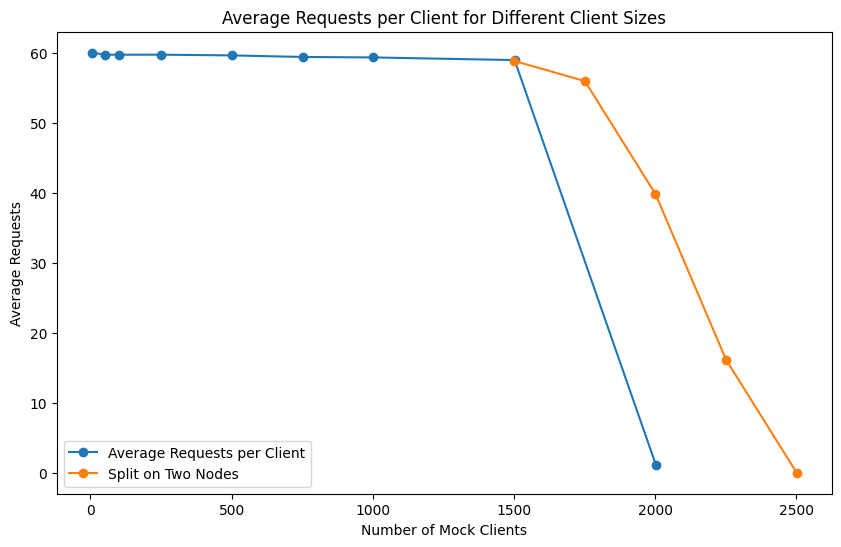

In [11]:
# Calculate the average amount of requests per client
average_requests_per_client = []
for number_of_mock_clients, requests in PROM_2_RESULT.items():
    number_of_mock_clients = len(requests)
    average_reqs = sum(requests) / number_of_mock_clients
    average_requests_per_client.append((number_of_mock_clients, average_reqs))

# Sort the results
average_requests_per_client.sort(key=lambda x: x[0])

OLD_DATA = [(6, 60.0), (51, 59.72549019607843), (102, 59.71568627450981), (251, 59.721115537848604), (501, 59.616766467065865), (752, 59.3936170212766), (1001, 59.32867132867133), (1502, 58.95073235685752), (2002, 1.2442557442557443)]

print(average_requests_per_client)

# Plotting the average amount of requests per client
plt.figure(figsize=(10, 6))
plt.plot(*zip(*OLD_DATA), marker='o', label="Average Requests per Client")
plt.plot(*zip(*average_requests_per_client), marker='o', label="Split on Two Nodes")
plt.xlabel('Number of Mock Clients')
plt.ylabel('Average Requests')
plt.title('Average Requests per Client for Different Client Sizes')
plt.legend()
plt.show()